In [1]:
import numpy as np
import teradata
import pandas as pd
from pandas import Series,DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics
import statsmodels.api as sm
from sklearn import preprocessing

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
y=df.large_loss_flag

In [5]:
x=df[["wprob","wb_life_min_wtd_bal","ws_dc_decay_720_decl_txn_num","wcbe_raito1","wdsc_achRetS","wb_avg_rcvd_d7","wdsc_neg_bal","wgtpv_7d_eg_ratio_rd","wdaily_tpv"]]

In [7]:
from sklearn import covariance
covariance.empirical_covariance(x,assume_centered=False)

array([[  4.74612507e-01,   1.86884434e-01,   1.10023675e-01,
          1.63550927e-02,   8.38020928e-02,  -7.09379662e-03,
          1.75412260e-01,   5.96262167e-03,  -7.05907271e-02],
       [  1.86884434e-01,   4.98888268e-01,   1.10538493e-01,
          4.94621619e-02,   8.19914380e-02,   1.75150616e-02,
          2.26839089e-01,  -7.23798102e-03,  -6.33724778e-03],
       [  1.10023675e-01,   1.10538493e-01,   3.85185565e-01,
          1.01054844e-02,   7.86238740e-02,  -2.03887438e-02,
          1.23351545e-01,  -1.29707028e-02,  -3.40876782e-02],
       [  1.63550927e-02,   4.94621619e-02,   1.01054844e-02,
          1.10527841e+00,   1.19383216e-02,   3.33816851e-01,
          9.96436322e-03,   3.34944251e-02,   1.84551137e-01],
       [  8.38020928e-02,   8.19914380e-02,   7.86238740e-02,
          1.19383216e-02,   2.39642904e-01,   1.72571560e-03,
          8.44781015e-02,   1.08774639e-03,  -9.56858396e-03],
       [ -7.09379662e-03,   1.75150616e-02,  -2.03887438e-02,
   

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

training score : 1.000 (logit)
testing score : 1.000 (logit)


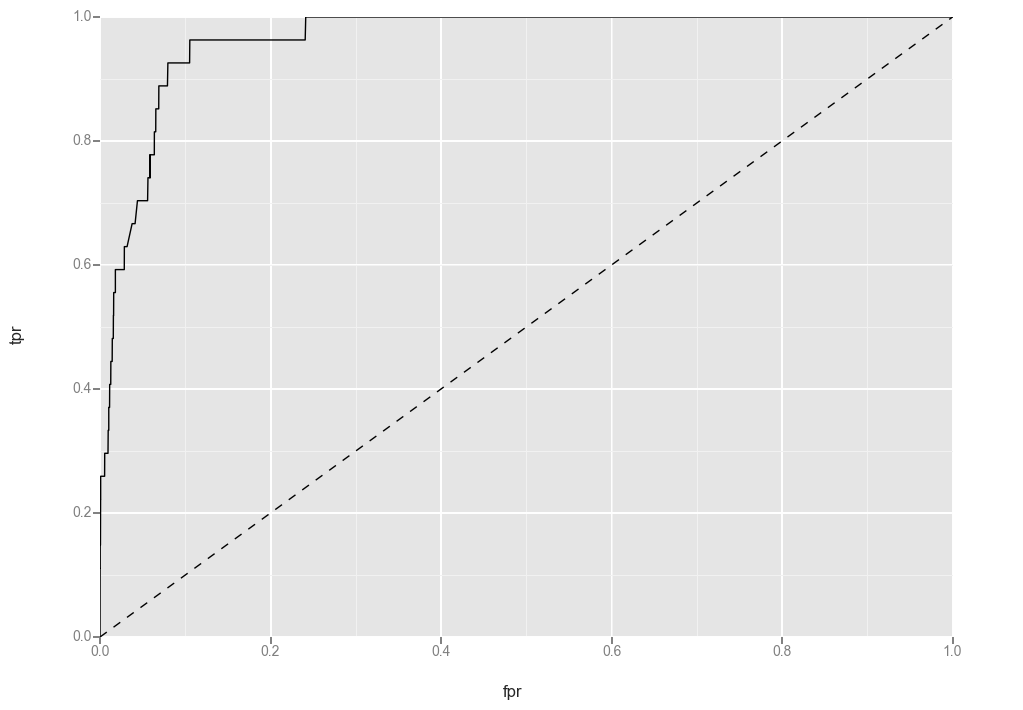

<ggplot: (310090017)>

In [10]:
#train on 0-2
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
clf_logit = LogisticRegression(solver='sag', max_iter=100, random_state=42).fit(x_train, y_train)
# print the training scores
print("training score : %.3f (%s)" % (clf_logit.score(x_train, y_train),'logit'))
print("testing score : %.3f (%s)" % (clf_logit.score(x_test, y_test), 'logit'))
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = clf_logit.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [11]:
clf_logit.coef_

array([[ 0.74774917,  0.19683564,  0.72931785,  0.44019565,  0.25054108,
         0.50761612,  0.2327762 , -0.01114775,  1.09296578]])

In [12]:
clf_logit.intercept_

array([-8.20753835])

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

df = sns.load_dataset("iris")